In [1]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/Rtmpnjnkei/remotesf12267aea2f8/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Loading required package: data.table



In [2]:
library(tidyverse)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [4]:
valiseesti_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti" | keyid=="eestipost" | keyid=="vabaeestlane" | keyid=="vabaeestisona" | keyid=="meiekodu" | keyid=="voitleja")

In [5]:
head(valiseesti_ajalehed, 5)

DocumentID,keyid,attrs,DocumentDate,DocumentTitle,DocumentType,series,DocumentNumber,DocumentVolume,pages,⋯,n_pages,n_articles_lemmas,n_pages_lemmas,n_articles_metadata,n_pages_metadata,pages_exist,sections_exist,decade,zippath_pages_meta,zippath_sections_meta
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<int>,<chr>,<chr>
eestipost19451106,eestipost,1,6 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451110,eestipost,2,10 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,8,NA,8,0,8,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451113,eestipost,3,13 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451115,eestipost,4,15 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451117,eestipost,5,17 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,


In [6]:
searchterm <- "balti"
searchfile <- "balti_lemmas.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [7]:
texts1 <- fread("balti_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts1[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta <- texts1 %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [8]:
valiseesti_aastad_balti <- fileids_w_meta %>% 
  count(year) %>% mutate(set="balti")

In [9]:
colnames(valiseesti_aastad_balti)[2]  <- "n1"

In [10]:
subset_meta <- get_subset_meta(valiseesti_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/Rtmpnjnkei/filef1224bc358d9' has size 0. Returning a NULL data.table.”


In [11]:
subset_wordcounts <- subset_meta %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [12]:
head(subset_wordcounts, 5)

year,words
<int>,<int>
1944,212175
1945,1711519
1946,3156818
1947,5109892
1948,5112470


In [13]:
colnames(subset_wordcounts)[2]  <- "words2"

In [14]:
rootsi_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [15]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed, searchtype="lemmas", source="pages")

In [16]:
texts2 <- fread("balti_lemmas_rootsi.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts2[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta2 <- texts2 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [17]:
rootsi_aastad_balti <- fileids_w_meta2 %>% 
  count(year) %>% mutate(set="balti")

In [18]:
subset_meta2 <- get_subset_meta(rootsi_ajalehed, source="pages")

In [19]:
subset_wordcounts2 <- subset_meta2 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [24]:
head(subset_wordcounts2, 5)

year,words
<int>,<int>
1944,212175
1945,1661642
1946,2286172
1947,3640298
1948,3720132


In [21]:
rootsi_graafik <- rootsi_aastad_balti %>% 
  left_join(valiseesti_aastad_balti, by="year") %>%
  left_join(subset_wordcounts,by="year") %>%
  left_join(subset_wordcounts2,by="year")

In [26]:
head(rootsi_graafik, 20)

year,n,set.x,n1,set.y,words2,words
<int>,<int>,<chr>,<int>,<chr>,<int>,<int>
1944,52,balti,52,balti,212175,212175
1945,423,balti,441,balti,1711519,1661642
1946,629,balti,907,balti,3156818,2286172
1947,618,balti,984,balti,5109892,3640298
1948,850,balti,1195,balti,5112470,3720132
1949,689,balti,909,balti,4269314,3191975
1950,672,balti,930,balti,4358835,3187325
1951,565,balti,872,balti,4016148,2927056
1952,566,balti,1213,balti,5475485,2931415


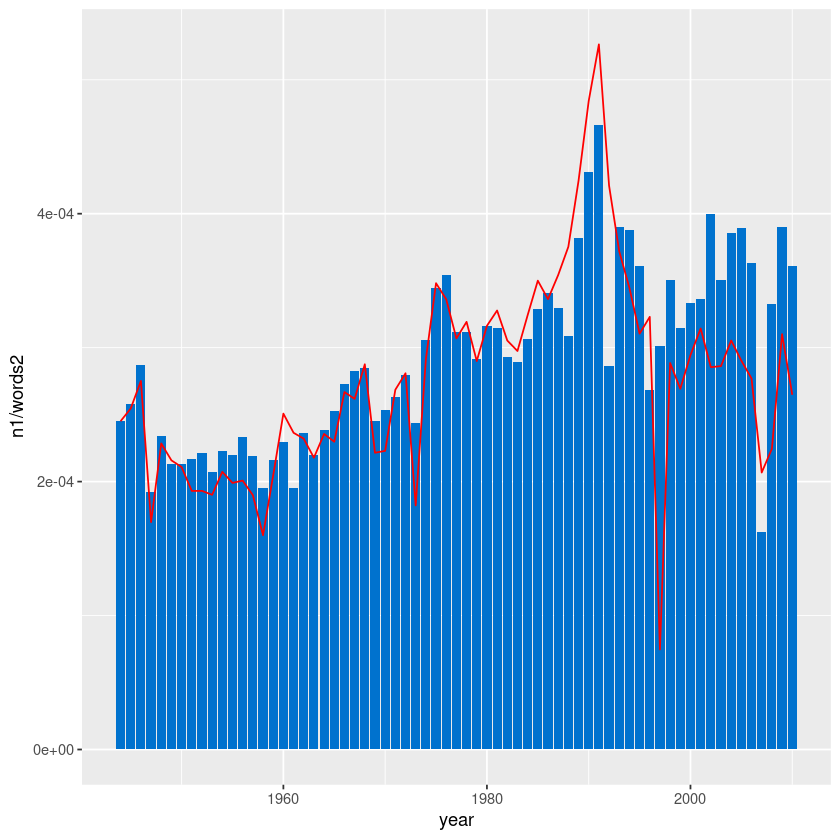

In [22]:
rootsi_graafik %>%
  ggplot(aes(x=year,y=n1/words2)) +
  geom_bar(stat = "identity", fill = "#0072CE") +
  geom_line(aes(x=year,y=n/words), stat = "identity", color = "red")

In [25]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [27]:
balti_concs_rootsi <- get_concordances(searchterm=searchterm,texts=texts2,before=50,after=50,txt="lemmas",id="id")

In [28]:
balti_concs <- balti_concs_rootsi[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs, "balti_concs.txt", sep="\t", quote = F, row.names = F)

In [54]:
stopsonad <- read.table("estonian-stopwords-lemmas.txt", header = TRUE, sep = "\t", encoding = "UTF-8", stringsAsFactors = T)

In [55]:
stopsonad

word
<fct>
all
alla
allapoole
allpool
alt
altpoolt
eel
eespool
enne


In [56]:
bigrams_separated <- balti_concs_rootsi %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [57]:
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [58]:
# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

In [114]:
head(bigram_counts, 50)

word1,word2,n
<chr>,<chr>,<int>
balti,riik,13675
balti,rahvas,4703
baltiska,baltiskas,2313
balti,komitee,2031
kolm,balti,1717
balti,põgenik,1447
de,baltiska,1369
balti,instituut,1076
liidu,liidud,914


In [64]:
bigram_graph <- bigram_counts %>%
  filter(n > 300) %>%
  graph_from_data_frame()

In [62]:
bigram_graph

IGRAPH f7357f1 DN-- 62 54 -- 
+ attr: name (v/c), n (e/n)
+ edges from f7357f1 (vertex names):
 [1] balti    ->riik           balti    ->rahvas        
 [3] baltiska ->baltiskas      balti    ->komitee       
 [5] kolm     ->balti          balti    ->põgenik       
 [7] de       ->baltiska       balti    ->instituut     
 [9] liidu    ->liidud         liidud   ->liit          
[11] balti    ->küsimus        balt     ->balti         
[13] balti    ->organisatsioon baltiskas->staterna      
[15] riik     ->küsimus        balti    ->vabariik      
+ ... omitted several edges

In [39]:
install.packages('ggraph', lib='~/R_pckg')
library(ggraph, lib.loc='~/R_pckg')

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’




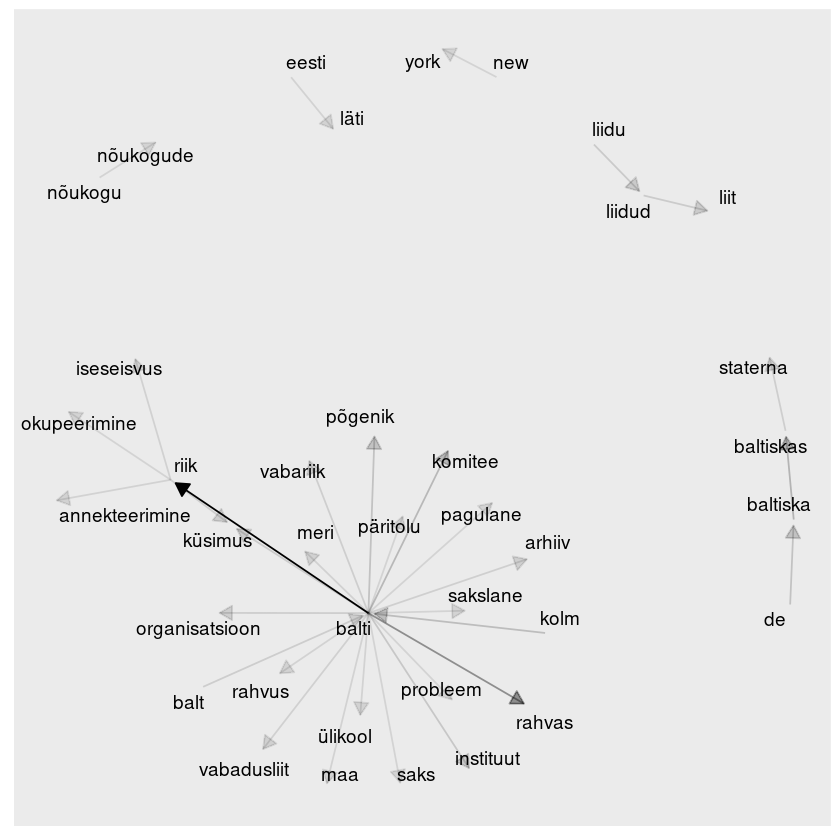

In [99]:
set.seed(2017)

a <- grid::arrow(type = "closed", length = unit(.12, "inches"))

ggraph(bigram_graph, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches')) +
    #geom_node_point(color = "lightblue", size = 5) +
    geom_node_text(aes(label = name), repel = TRUE, size=4)

In [101]:
rootsi_ajalehed1 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1943&year<1961) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [102]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi1.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed1, searchtype="lemmas", source="pages")

In [103]:
texts <- fread("balti_lemmas_rootsi1.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed1 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [104]:
balti_concs_rootsi1 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [105]:
balti_concs1 <- balti_concs_rootsi1[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs1, "balti_concs1.txt", sep="\t", quote = F, row.names = F)

In [109]:
trigrams_separated <- balti_concs_rootsi1 %>% 
  unnest_tokens(trigram, context, token = "ngrams", n = 3, n_min = 3) %>% 
  separate(trigram, c("word1", "word2", "word3"), sep = " ")

In [110]:
trigrams_filtered <- trigrams_separated %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word) %>%
  filter(!word3 %in% stopsonad$word)

In [112]:
trigram_counts <- trigrams_filtered %>% 
  count(word1, word2, word3, sort = TRUE)

In [113]:
head(trigram_counts, 20)

word1,word2,word3,n
<chr>,<chr>,<chr>,<int>
kolm,balti,riik,294
liidu,liidud,liit,250
balti,humanist,ühing,183
balti,riik,küsimus,160
kolm,balti,rahvas,160
balti,riik,iseseisvus,126
balti,riik,esindaja,121
balti,riik,annekteerimine,113
balti,riik,saatus,100


In [25]:
rootsi_ajalehed2 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1960&year<1985) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [26]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi2.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed2, searchtype="lemmas", source="pages")

In [27]:
texts <- fread("balti_lemmas_rootsi2.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed2 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [28]:
balti_concs_rootsi2 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [40]:
balti_concs2 <- balti_concs_rootsi2[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs2, "balti_concs2.txt", sep="\t", quote = F, row.names = F)

In [29]:
balti_trigrammid_rootsi2 <- balti_concs_rootsi2 %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [30]:
head(balti_trigrammid_rootsi2, 20)

word,n
<chr>,<int>
de baltiska baltiskas,766
baltiska baltiskas staterna,376
ja teine balti,370
balti riik küsimus,362
liidu liidud liit,359
teine balti riik,326
n liidu liidud,301
eesti ja teine,291
kolm balti riik,258


In [31]:
rootsi_ajalehed3 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1984&year<1996) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [32]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi3.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed3, searchtype="lemmas", source="pages")

In [33]:
texts <- fread("balti_lemmas_rootsi3.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed3 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [34]:
balti_concs_rootsi3 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [41]:
balti_concs3 <- balti_concs_rootsi3[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs3, "balti_concs3.txt", sep="\t", quote = F, row.names = F)

In [35]:
balti_trigrammid_rootsi3 <- balti_concs_rootsi3 %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [36]:
head(balti_trigrammid_rootsi3, 20)

word,n
<chr>,<int>
de baltiska baltiskas,346
kolm balti riik,233
teine balti riik,186
liidu liidud liit,174
ja teine balti,155
baltiska baltiskas staterna,152
balti riik iseseisvus,132
et balti riik,126
balti riik ja,123
